### Data
dash_cli.049 PIK Historical Emissions<br>
https://resourcewatch.carto.com/u/wri-rw/dataset/cli_049_pik_world_sectoral_ar4 <br>

In [2]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: c62cb2d4-2b42-437e-9724-02c1e795f0e1 <br>
https://resourcewatch.org/embed/widget/c62cb2d4-2b42-437e-9724-02c1e795f0e1

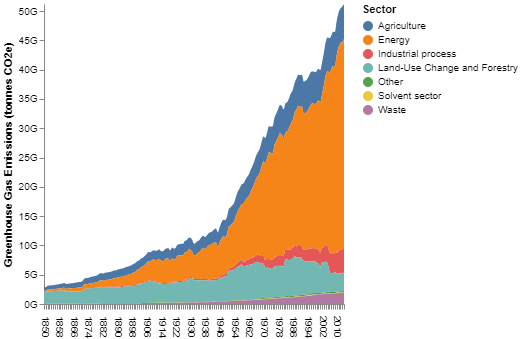

In [5]:
specV3=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ],
      "value": null,
      "name": "hover"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT datetime as x, yr_data AS y, sector AS c FROM cli_049_pik_world_sectoral_ar4 WHERE sector NOT ILIKE 'Total including LULUCF' ORDER BY c ASC, x ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "formula",
          "as": "y",
          "expr": "datum.y*1000000"
        },
        {
          "type": "formula",
          "as": "x",
          "expr": "slice(datum.x,0,4)"
        },
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          }
        }
      ]
    },
    {
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ],
      "source": "table",
      "name": "dots"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {
        "data": "table",
        "field": "c"
      }
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "middle"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Greenhouse Gas Emissions (tonnes CO2e)",
      "orient": "left",
      "scale": "y",
      "format": ".0s",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "hover": {
              "fillOpacity": {
                "value": 0.5
              }
            },
            "update": {
              "fillOpacity": {
                "value": 1
              }
            },
            "enter": {
              "fill": {
                "field": "c",
                "scale": "color"
              },
              "y2": {
                "field": "y1",
                "scale": "y"
              },
              "y": {
                "field": "y0",
                "scale": "y"
              },
              "width": {
                "scale": "x",
                "band": 1,
                "offset": "-1"
              },
              "x": {
                "field": "x",
                "scale": "x"
              },
              "interpolate": {
                "value": "monotone"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "type": "area"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "areas"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "stroke": {
            "value": "#fff"
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        }
      },
      "transform": [
        {
          "sort": {
            "field": "sector",
            "order": "descending"
          },
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "pointss"
      },
      "type": "path",
      "name": "cell"
    }
  ],
  "legends": [
    {
      "title": "Sector",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "datum.y",
            "property": "Emissions (t CO2e)",
            "type": "number",
            "format": ".3s"
          },
          {
            "column": "datum.c",
            "property": "Sector",
            "type": "string"
          },
          {
            "column": "datum.x",
            "property": "Year",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

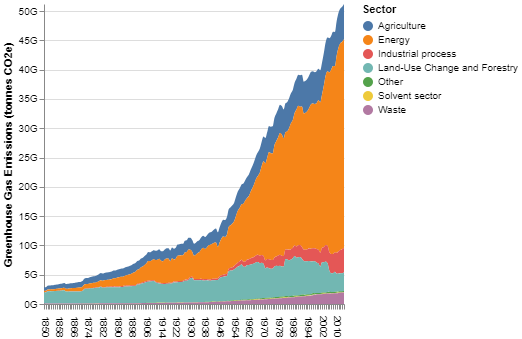

In [6]:
specV3=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ],
      "value": null,
      "name": "hover"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT datetime as x, yr_data AS y, sector AS c FROM cli_049_pik_world_sectoral_ar4 WHERE sector NOT ILIKE 'Total including LULUCF' ORDER BY c ASC, x ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "formula",
          "as": "y",
          "expr": "datum.y*1000000"
        },
        {
          "type": "formula",
          "as": "x",
          "expr": "slice(datum.x,0,4)"
        },
        {
          "type": "stack",
          "field": "y",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          }
        }
      ]
    },
    {
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ],
      "source": "table",
      "name": "dots"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": false,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {
        "data": "table",
        "field": "c"
      }
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 6,
      "encode": {
        "labels": {
          "update": {
            "limit": {
              "value": 50
            },
            "angle": {
              "value": 90
            },
            "align": {
              "value": "middle"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Greenhouse Gas Emissions (tonnes CO2e)",
      "orient": "left",
      "scale": "y",
      "format": ".0s",
      "grid": true,
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "hover": {
              "fillOpacity": {
                "value": 0.5
              }
            },
            "update": {
              "fillOpacity": {
                "value": 1
              }
            },
            "enter": {
              "fill": {
                "field": "c",
                "scale": "color"
              },
              "y2": {
                "field": "y1",
                "scale": "y"
              },
              "y": {
                "field": "y0",
                "scale": "y"
              },
              "width": {
                "scale": "x",
                "band": 1,
                "offset": "-1"
              },
              "x": {
                "field": "x",
                "scale": "x"
              },
              "interpolate": {
                "value": "monotone"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "type": "area"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "areas"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "stroke": {
            "value": "#fff"
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y1",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        },
        "hover": {
          "tooltip": {
            "signal": "{'Emissions':format(hover.datum.y,'.3s')+'t CO2e', 'Sector':hover.datum.c, 'Year':hover.datum.x}"
          }
        }
      },
      "transform": [
        {
          "sort": {
            "field": "sector",
            "order": "descending"
          },
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "pointss"
      },
      "type": "path",
      "name": "cell"
    }
  ],
  "legends": [
    {
      "title": "Sector",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
Vega(vega4view)